In [1]:
using TaylorSeries, TaylorIntegration

In [9]:
function jetcoeffs!{T<:Number,S<:Number}(eqsdiff, t0::T, x::Vector{Taylor1{S}})
    order = x[1].order
    xaux = similar(x)
    for ord in 1:order
        ordnext = ord+1
        
        # Set `xaux`, auxiliary vector of Taylor1 to order `ord`
        @inbounds for j in eachindex(x)
            xaux[j] = Taylor1( x[j].coeffs[1:ord] )
        end
        
        # Equations of motion
        # TODO! define a macro to optimize the eqsdiff
        xdot = eqsdiff(t0, xaux)
        
        # Recursion relations
        @inbounds for j in eachindex(x)
            x[j].coeffs[ordnext] = xdot[j].coeffs[ord]/ord
        end
    end
    nothing
end

jetcoeffs! (generic function with 1 method)

In [86]:
f(t, x) = [x[2], -x[1]] #oscilador armónico

f (generic function with 1 method)

In [120]:
p1, p2 = set_variables("ξ", numvars=2, order=4)

2-element Array{TaylorSeries.TaylorN{Float64},1}:
  1.0 ξ₁ + 𝒪(‖x‖⁵)
  1.0 ξ₂ + 𝒪(‖x‖⁵)

In [121]:
# x0 = [1.0, 0.0] # diff eq initial condition
x0 = [0.0, 1.0] # diff eq initial condition

2-element Array{Float64,1}:
 0.0
 1.0

In [122]:
x0TN = x0 + [p1, p2] #jet transport initial condition

2-element Array{TaylorSeries.TaylorN{Float64},1}:
        1.0 ξ₁ + 𝒪(‖x‖⁵)
  1.0 + 1.0 ξ₂ + 𝒪(‖x‖⁵)

In [123]:
i=1
order=25
t0=0.0
t=t0
δt = 4pi/1000
tmax=10.0
tT=Float64[]
# xT=Array{Float64,1}[]
push!(tT, t0)
# push!(xT, x0)

vv_xTN = Vector{TaylorSeries.TaylorN{Float64}}[]
push!(vv_xTN, x0TN)


1-element Array{Array{TaylorSeries.TaylorN{Float64},1},1}:
 TaylorSeries.TaylorN{Float64}[ 1.0 ξ₁ + 𝒪(‖x‖⁵), 1.0 + 1.0 ξ₂ + 𝒪(‖x‖⁵)]

In [124]:
i, t, δt

(1,0.0,0.012566370614359173)

In [125]:
# while t<tmax
while i<1001
    xT = [Taylor1(vv_xTN[i][1], order), Taylor1(vv_xTN[i][2], order)]
    jetcoeffs!(f, t, xT)
    push!(vv_xTN, evaluate(xT, δt))
    t=t+δt
    push!(tT, t)
    i+=1
end

In [93]:
i, t, δt

(1001,12.566370614358947,0.012566370614359173)

In [94]:
vv_xTN[end]

2-element Array{TaylorSeries.TaylorN{Float64},1}:
  3.139849491518021e-16 + 1.0000000000000009 ξ₁ - 3.139849491518021e-16 ξ₂ + 𝒪(‖x‖¹¹)
   - 1.0000000000000009 + 3.139849491518021e-16 ξ₁ + 1.0000000000000009 ξ₂ + 𝒪(‖x‖¹¹)

In [135]:
norm(map(x->evaluate(x, [0.01, 0.01]), vv_xTN[400])-x0), norm(map(x->evaluate(x, [0.01, 0.01]), vv_xTN[1])-x0)

(1.1836717088447526,0.014142135623730958)

In [127]:
delta1=0.1
delta2=delta1
xi1=Float64[]
xi2=Float64[]
xT=Float64[]
yT=Float64[]
push!(xi1, x0[1]+delta1)
push!(xi2, x0[2]+delta2)
push!(xT, x0[1])
push!(yT, x0[2])


for j in 1:i
    tempxy = map(x->evaluate(x, [0.0, 0.0]), vv_xTN[j])
    tempxi = map(x->evaluate(x, [delta1, delta2]), vv_xTN[j])
    push!(xi1, tempxi[1])
    push!(xi2, tempxi[2])
    push!(xT, tempxy[1])
    push!(yT, tempxy[2])
end
    

In [106]:
using PyPlot

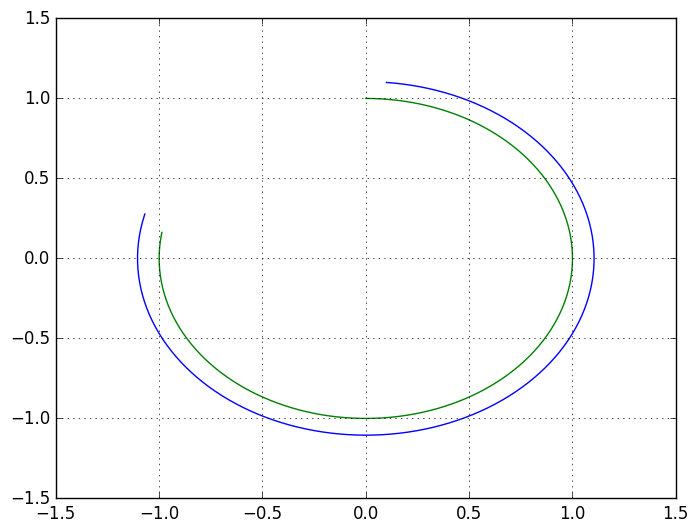

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32b11d290>
 PyObject <matplotlib.lines.Line2D object at 0x32b11d490>

In [140]:
last=390
xlim(-1.5,1.5)
ylim(-1.5,1.5)
grid(true)
plot(xi1[1:last],xi2[1:last],"b",xT[1:last],yT[1:last],"g")